In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryCrossentropy
import matplotlib.pyplot as plt

2023-12-21 13:52:05.093846: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 13:52:05.185318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 13:52:05.185367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 13:52:05.188813: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 13:52:05.203993: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 13:52:05.206428: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
#load dataset
df = pd.read_csv("UTS2/heart_failure_clinical_records_dataset.csv")
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
# Menentukan data input (features)
X = df.drop("DEATH_EVENT", axis=1)
# Menentukan data target (label)
y = df["DEATH_EVENT"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [6]:
#Rancang Arsitektur Jaringan Saraf Tiruan (JST)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[BinaryCrossentropy()])

In [8]:
# Latih model dan simpan riwayat pelatihan
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
7/7 [==============================] - 2s 62ms/step - loss: 6215.0303 - binary_crossentropy: 6215.0303 - val_loss: 1606.6971 - val_binary_crossentropy: 1606.6971
Epoch 2/250
7/7 [==============================] - 0s 19ms/step - loss: 3117.1609 - binary_crossentropy: 3117.1609 - val_loss: 2545.3540 - val_binary_crossentropy: 2545.3540
Epoch 3/250
7/7 [==============================] - 0s 18ms/step - loss: 2336.0376 - binary_crossentropy: 2336.0376 - val_loss: 177.1132 - val_binary_crossentropy: 177.1132
Epoch 4/250
7/7 [==============================] - 0s 27ms/step - loss: 1120.7438 - binary_crossentropy: 1120.7438 - val_loss: 280.4543 - val_binary_crossentropy: 280.4543
Epoch 5/250
7/7 [==============================] - 0s 19ms/step - loss: 1077.6520 - binary_crossentropy: 1077.6520 - val_loss: 699.3715 - val_binary_crossentropy: 699.3715
Epoch 6/250
7/7 [==============================] - 0s 18ms/step - loss: 630.2474 - binary_crossentropy: 630.2474 - val_loss: 296.1628 - 

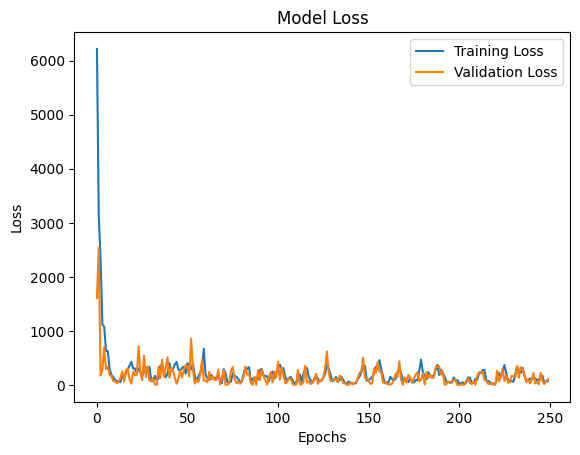

In [9]:
# Tampilkan grafik loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()